# Introdução à Análise e Predição de Séries Temporais em Python - Aula 2

# Visualização de Dados

In [3]:
import pandas as pd

In [4]:
url = 'https://github.com/Pi-vi/SEPEX2024/blob/main/df1.xlsx?raw=true'
dados = pd.read_excel(url)

In [5]:
dados['Nome'] = dados['Primeiro Nome'] + ' ' + dados['Sobrenome'] 

In [6]:
dados = dados.sort_values(by='Nome', ascending=True)

In [7]:
dados = dados.reset_index(drop=True)

In [8]:
dados['Média'] = (dados['P1']*0.7 + dados['Trabalho 1']*0.3 + dados['P2']*0.7 + dados['Trabalho 2']*0.3)/2

In [9]:
def verific(media):
    if media >= 7:
        return 'Aprovado'
    else:
        return 'Reprovado'

In [10]:
dados['Status'] = dados['Média'].apply(verific)

In [11]:
dados.to_excel("dados1.xlsx")  

<Axes: ylabel='count'>

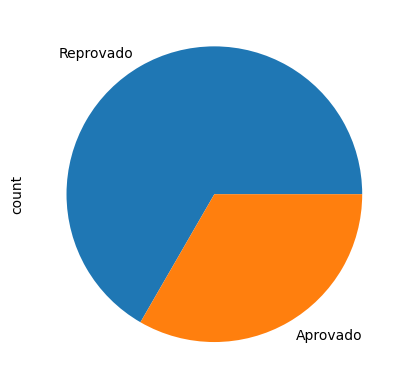

In [12]:
dados['Status'].value_counts().plot.pie()

<Axes: title={'center': 'Numero de Aprovados'}, xlabel='Situação', ylabel='Número de Alunos'>

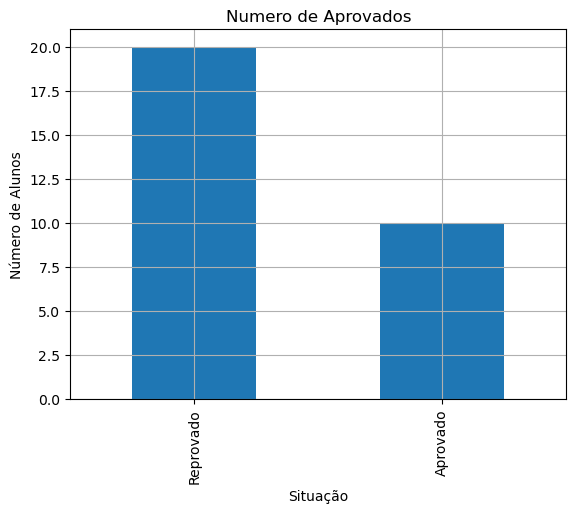

In [13]:
dados['Status'].value_counts().plot.bar(title='Numero de Aprovados',ylabel='Número de Alunos',xlabel = 'Situação',grid=True)

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

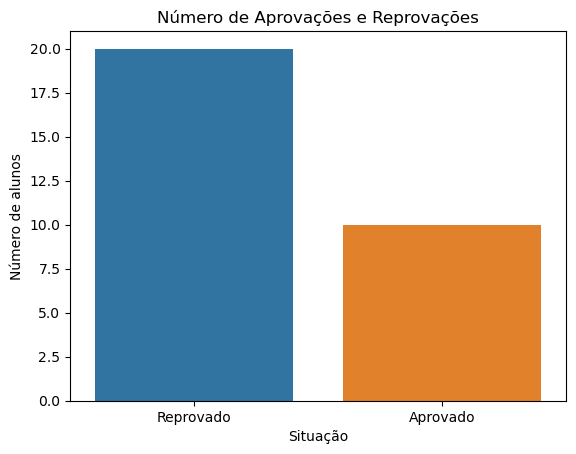

In [15]:
plt.figure()
ax = sns.countplot(x = 'Status',data=dados)
ax.set_title('Número de Aprovações e Reprovações')
plt.ylabel('Número de alunos')
plt.xlabel('Situação')
plt.show()

In [16]:
round(dados['P1'])

0      4.0
1      7.0
2      6.0
3      5.0
4      NaN
5     10.0
6      7.0
7      7.0
8      5.0
9      9.0
10     6.0
11     9.0
12     7.0
13     4.0
14     9.0
15     6.0
16     5.0
17     8.0
18     4.0
19     8.0
20     6.0
21     5.0
22     6.0
23     3.0
24     6.0
25     4.0
26     8.0
27     8.0
28     8.0
29    10.0
Name: P1, dtype: float64

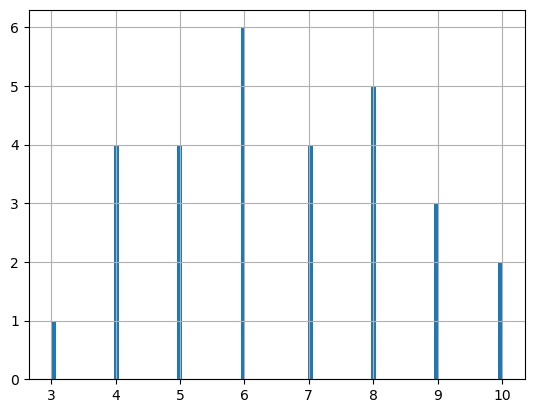

In [17]:
plt.figure()
round(dados['P1']).hist(bins = 100)
plt.show()

# Séries Temporais

In [19]:
import numpy as np

* Tendência
* Sazonalidade
* Ciclos

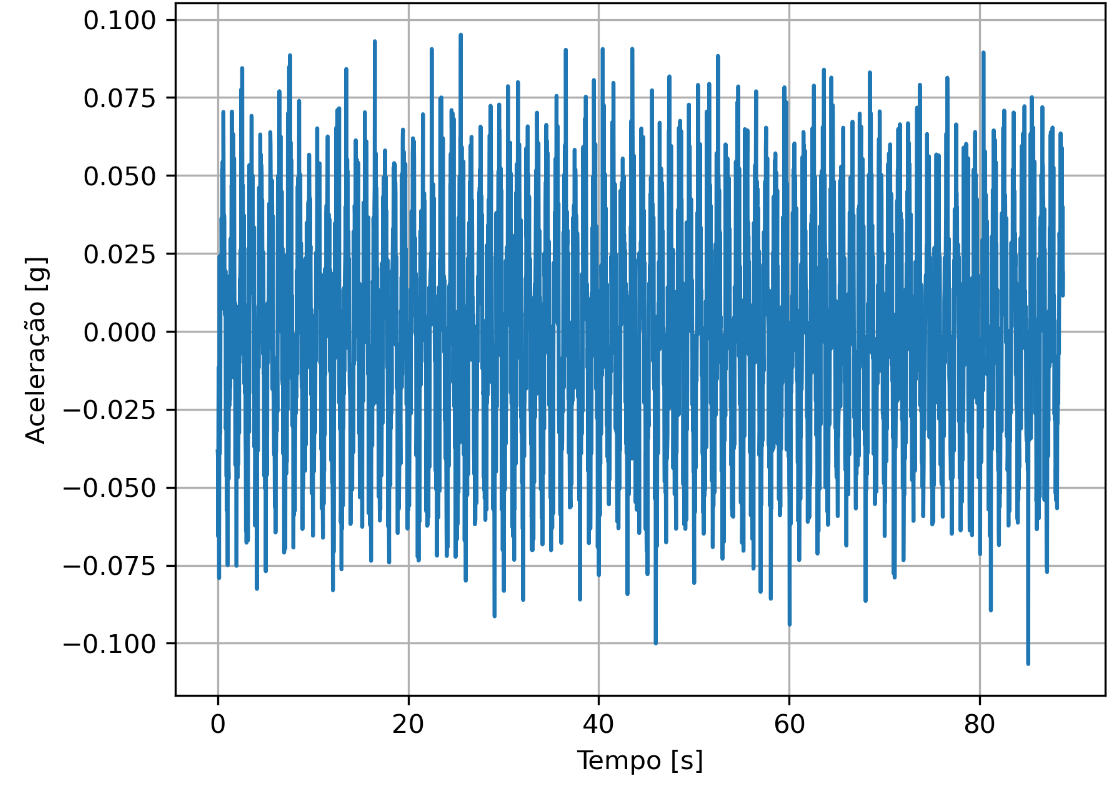

## Regressão Linear

In [23]:
dados2 = pd.read_excel('df2.xlsx')

In [24]:
dados2

,Unnamed: 0,Tempo,Y
0,0,0.00,1.385371
1,1,0.01,2.185222
2,2,0.02,1.687221
3,3,0.03,2.190242
4,4,0.04,1.621513
...,...,...,...
1996,1996,19.96,3.274947
1997,1997,19.97,3.106815
1998,1998,19.98,2.371095
1999,1999,19.99,2.396558


In [25]:
import matplotlib.pyplot as plt

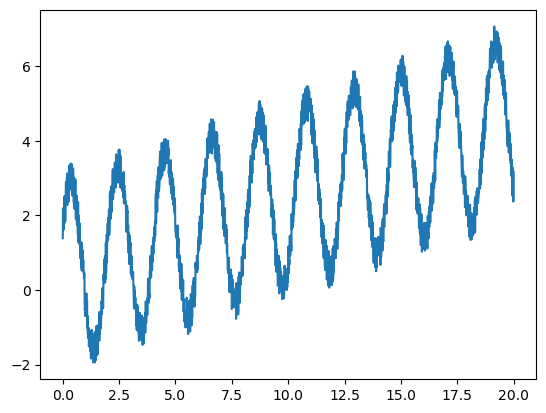

In [26]:
plt.figure()
plt.plot(dados2['Tempo'],dados2['Y'])

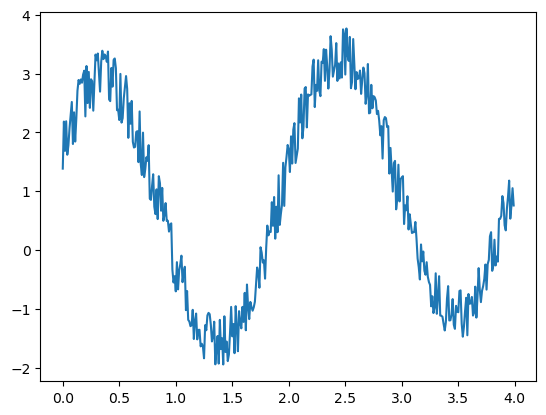

In [27]:
plt.figure()
plt.plot(dados2['Tempo'][0:400],dados2['Y'][0:400])

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
# Training data
X = dados2.loc[:, ['Tempo']]  # features
y = dados2.loc[:, 'Y']  # target

In [30]:
# Train the model
model = LinearRegression(fit_intercept=False)
model.fit(X, y)

LinearRegression(fit_intercept=False)

In [31]:
# Armazena os valores ajustados como uma série temporal com os mesmos índices que os dados de treino
y_pred = pd.Series(model.predict(X), index=X.index)

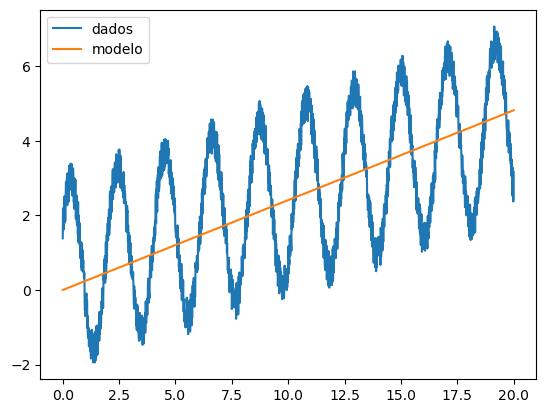

In [32]:
plt.figure()
plt.plot(dados2['Tempo'],dados2['Y'])
plt.plot(X,y_pred)
plt.legend(['dados','modelo'])

## Tendência

In [34]:
dados3 = pd.read_csv('multiTimeline.csv')

In [35]:
dados3.shape

(262, 2)

In [36]:
dados3 = dados3.iloc[0:].reset_index(drop=True)

In [37]:
dados3

,Semana,chuva: (Brasil)
0,2019-10-13,37
1,2019-10-20,50
2,2019-10-27,49
3,2019-11-03,44
4,2019-11-10,51
...,...,...
257,2024-09-15,57
258,2024-09-22,48
259,2024-09-29,42
260,2024-10-06,62


In [38]:
dados3['Semana'] = np.arange(len(dados3.index)) # cria o time dummy

In [39]:
dados3.head()

,Semana,chuva: (Brasil)
0,0,37
1,1,50
2,2,49
3,3,44
4,4,51


In [40]:
media_movel = dados3.rolling(
    window=250,       # janela de 5 semanas
    center=True,      # puts the average at the center of the window
    min_periods=125,  # choose about half the window size
).mean()              # compute the mean (could also do median, std, min, max, ...)

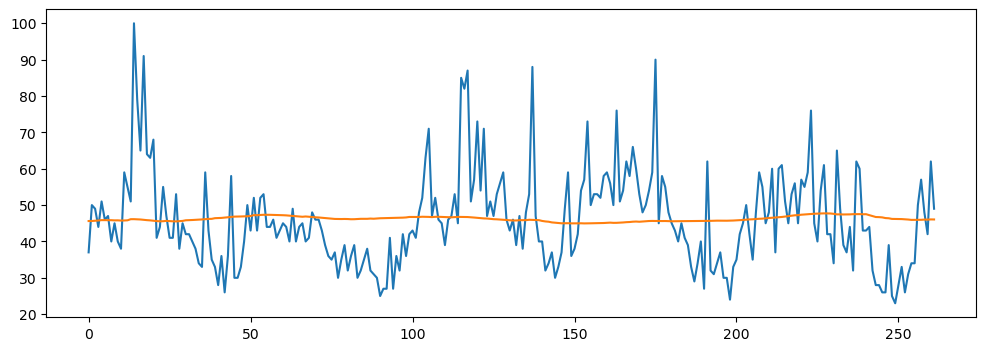

In [41]:
plt.figure(figsize=(12,4))
plt.plot(dados3['Semana'],dados3['chuva: (Brasil)'])
plt.plot(dados3['Semana'],media_movel['chuva: (Brasil)'])
plt.show()

In [42]:
from statsmodels.tsa.deterministic import DeterministicProcess

In [43]:
dp = DeterministicProcess(
    index=dados3.index,  # dates from the training data
    constant=True,       # dummy feature for the bias (y_intercept)
    order=1,             # the time dummy (trend)
    drop=True,           # drop terms if necessary to avoid collinearity
)
# `in_sample` creates features for the dates given in the `index` argument
X = dp.in_sample()

X.head()

,const,trend
0,1.0,1.0
1,1.0,2.0
2,1.0,3.0
3,1.0,4.0
4,1.0,5.0


In [44]:
y = dados3['chuva: (Brasil)']  # the target

# The intercept is the same as the `const` feature from
# DeterministicProcess. LinearRegression behaves badly with duplicated
# features, so we need to be sure to exclude it here.
model = LinearRegression(fit_intercept=False)
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

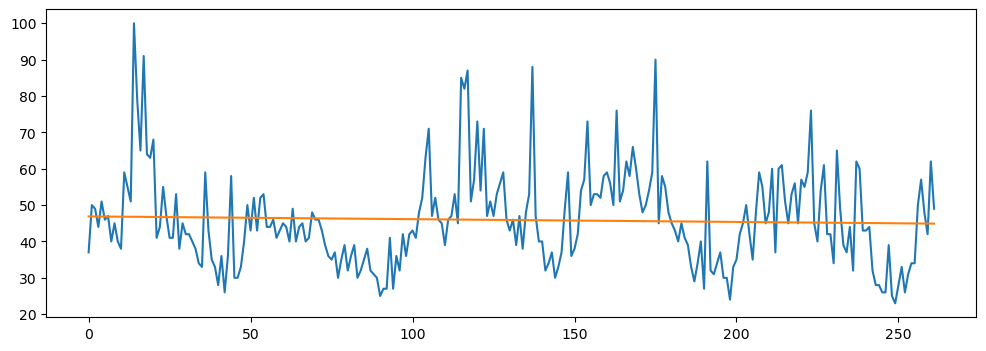

In [45]:
plt.figure(figsize=(12,4))
plt.plot(dados3['Semana'],dados3['chuva: (Brasil)'])
plt.plot(dados3['Semana'],y_pred)
plt.show()

In [46]:
X = dp.out_of_sample(steps=30)

y_fore = pd.Series(model.predict(X), index=X.index)

y_fore.head()

262    44.903483
263    44.895899
264    44.888316
265    44.880732
266    44.873148
dtype: float64

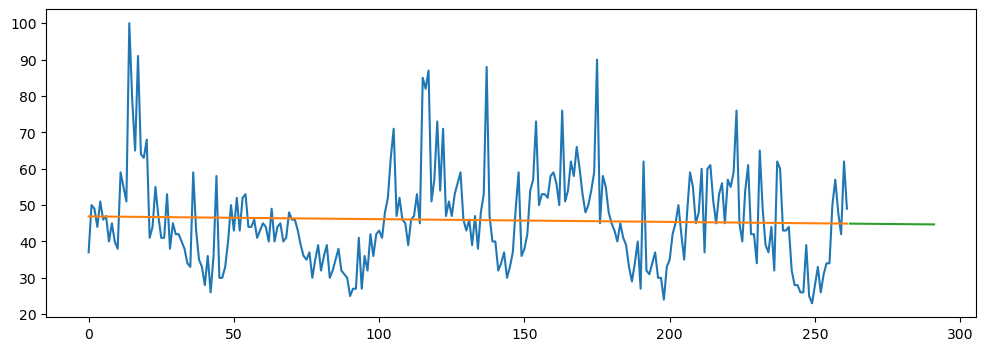

In [47]:
plt.figure(figsize=(12,4))
plt.plot(dados3['Semana'],dados3['chuva: (Brasil)'])
plt.plot(dados3['Semana'],y_pred)
plt.plot(y_fore)
plt.show()

## Sazonalidade

### Séries de Fourier

In [50]:
from scipy.signal import periodogram

In [51]:
Y = dados3['chuva: (Brasil)']
fs = 1

In [52]:
f, Pxx_den = periodogram(Y, fs)

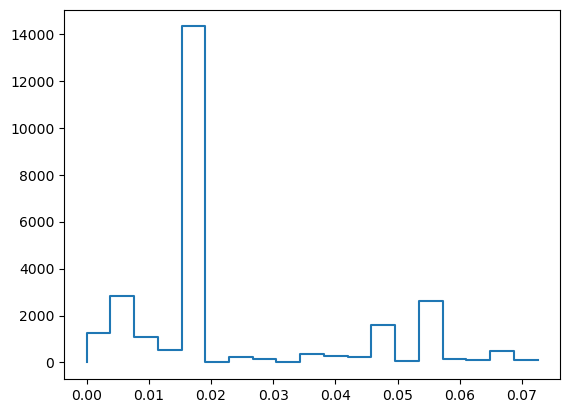

In [53]:
plt.step(f[0:20],Pxx_den[0:20])

In [54]:
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess,Fourier

In [55]:
fourier = Fourier(period=52, order=5)

In [56]:
dp = DeterministicProcess(
    index = dados3.index,
    constant=True,               # dummy feature for bias (y-intercept)
    order=1,                     # trend (order 1 means linear)
    #seasonal=True,               # weekly seasonality (indicators)
    additional_terms=[fourier],  # annual seasonality (fourier)
    #fourier = 1,
    drop=True,                   # drop terms to avoid collinearity
)

In [57]:
X = dp.in_sample()  # create features for dates in tunnel.index

In [58]:
y = dados3['chuva: (Brasil)']
model = LinearRegression(fit_intercept=False)
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)


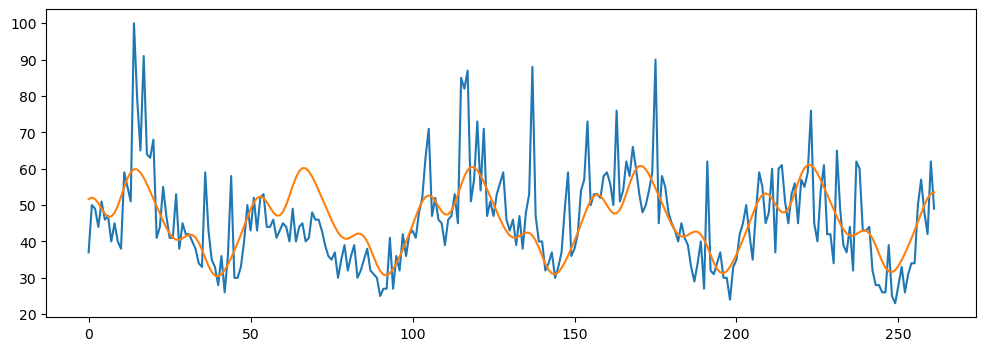

In [59]:
plt.figure(figsize=(12,4))
plt.plot(dados3['Semana'],dados3['chuva: (Brasil)'])
plt.plot(dados3['Semana'],y_pred)
plt.show()

In [60]:
X_fore = dp.out_of_sample(steps=30)

y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)


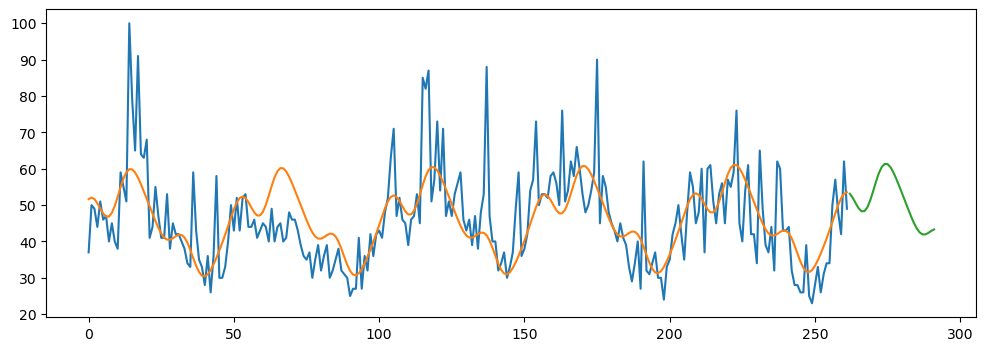

In [61]:
plt.figure(figsize=(12,4))
plt.plot(dados3['Semana'],dados3['chuva: (Brasil)'])
plt.plot(dados3['Semana'],y_pred)
plt.plot(y_fore)
plt.show()

## Modelos Híbridos com Resíduos

In [63]:
y_resid = y - y_pred

In [64]:
# Train XGBoost on the residuals
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X, y_resid)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [65]:
y_pred_boosted = xgb.predict(X) + y_pred

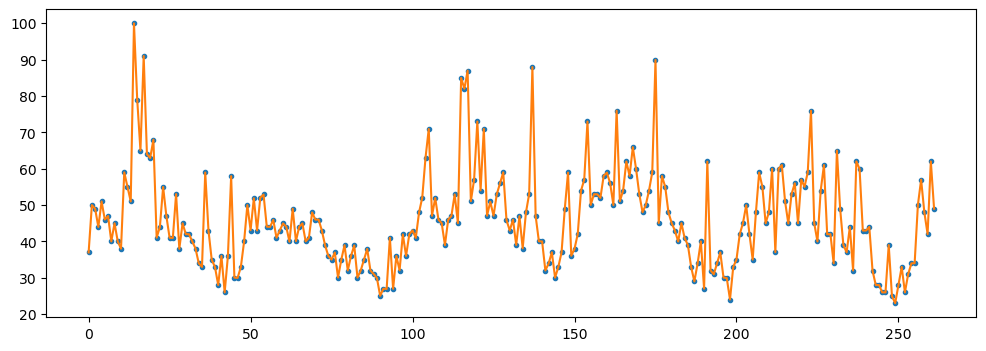

In [66]:
plt.figure(figsize=(12,4))
plt.plot(dados3['Semana'],dados3['chuva: (Brasil)'],'.')
plt.plot(dados3['Semana'],y_pred_boosted)
plt.show()

In [67]:
y_fore_boosted = xgb.predict(X_fore) + y_fore

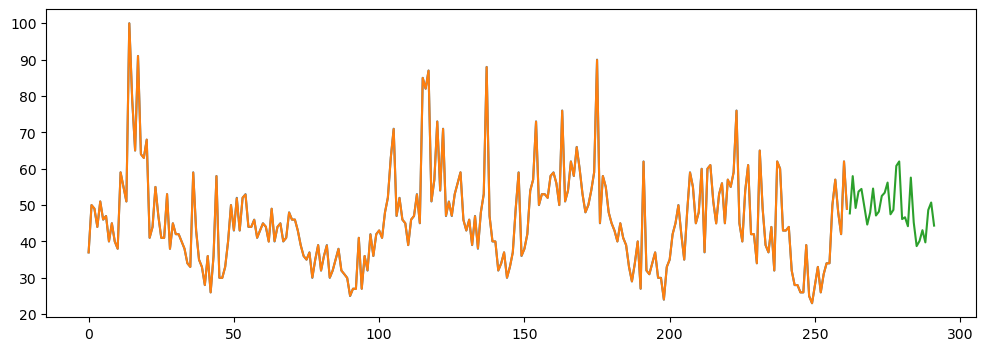

In [129]:
plt.figure(figsize=(12,4))
plt.plot(dados3['Semana'],dados3['chuva: (Brasil)'])
plt.plot(dados3['Semana'],y_pred_boosted)
plt.plot(y_fore_boosted)
plt.show()